In [1]:
from typing import Tuple, List, Text, Dict, Any, Iterator, Union, Sized, Callable
import sys
import os
import numpy as np
sys.path.append("/usr/local/Cellar/opencv3/3.2.0/lib/python3.5/site-packages/") # mac opencv path
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
sys.path.append("./coco/PythonAPI/")
from pycocotools.coco import COCO
from pycocotools import mask as coco_mask

def mtx_plot(fnmtx, ratio):
    h = len(fnmtx[0])
    w = len(fnmtx)
    k = 1
    fig = plt.figure(figsize=(ratio[0]*h, ratio[1]*w))
    for fnarr in fnmtx:
        for fn in fnarr:
            fig.add_subplot(w,h,k)
            fn(k)
            k += 1

In [2]:
from mscoco import CamVid, check, load_image, create_mask, create_head_mask
coco = COCO("./annotations/person_keypoints_train2014.json")
#CamVid("./annotations/person_keypoints_train2014.json", None, (256, 256), use_data_check=True, data_aug=True, drop_crowd=False, drop_small=False, need_head=False, need_body=False)

loading annotations into memory...
Done (t=13.60s)
creating index...
index created!


In [3]:
infos = coco.loadImgs(coco.getImgIds(catIds=coco.getCatIds(catNms=['person']))) # type: List[dict]
print(len(infos))
infos = [info for info in infos if check(coco, info, drop_crowd=True, drop_small=False, need_head=True, need_shoulder=True, need_elbow=False, need_llium=False)]
print(len(infos))

45174
17011


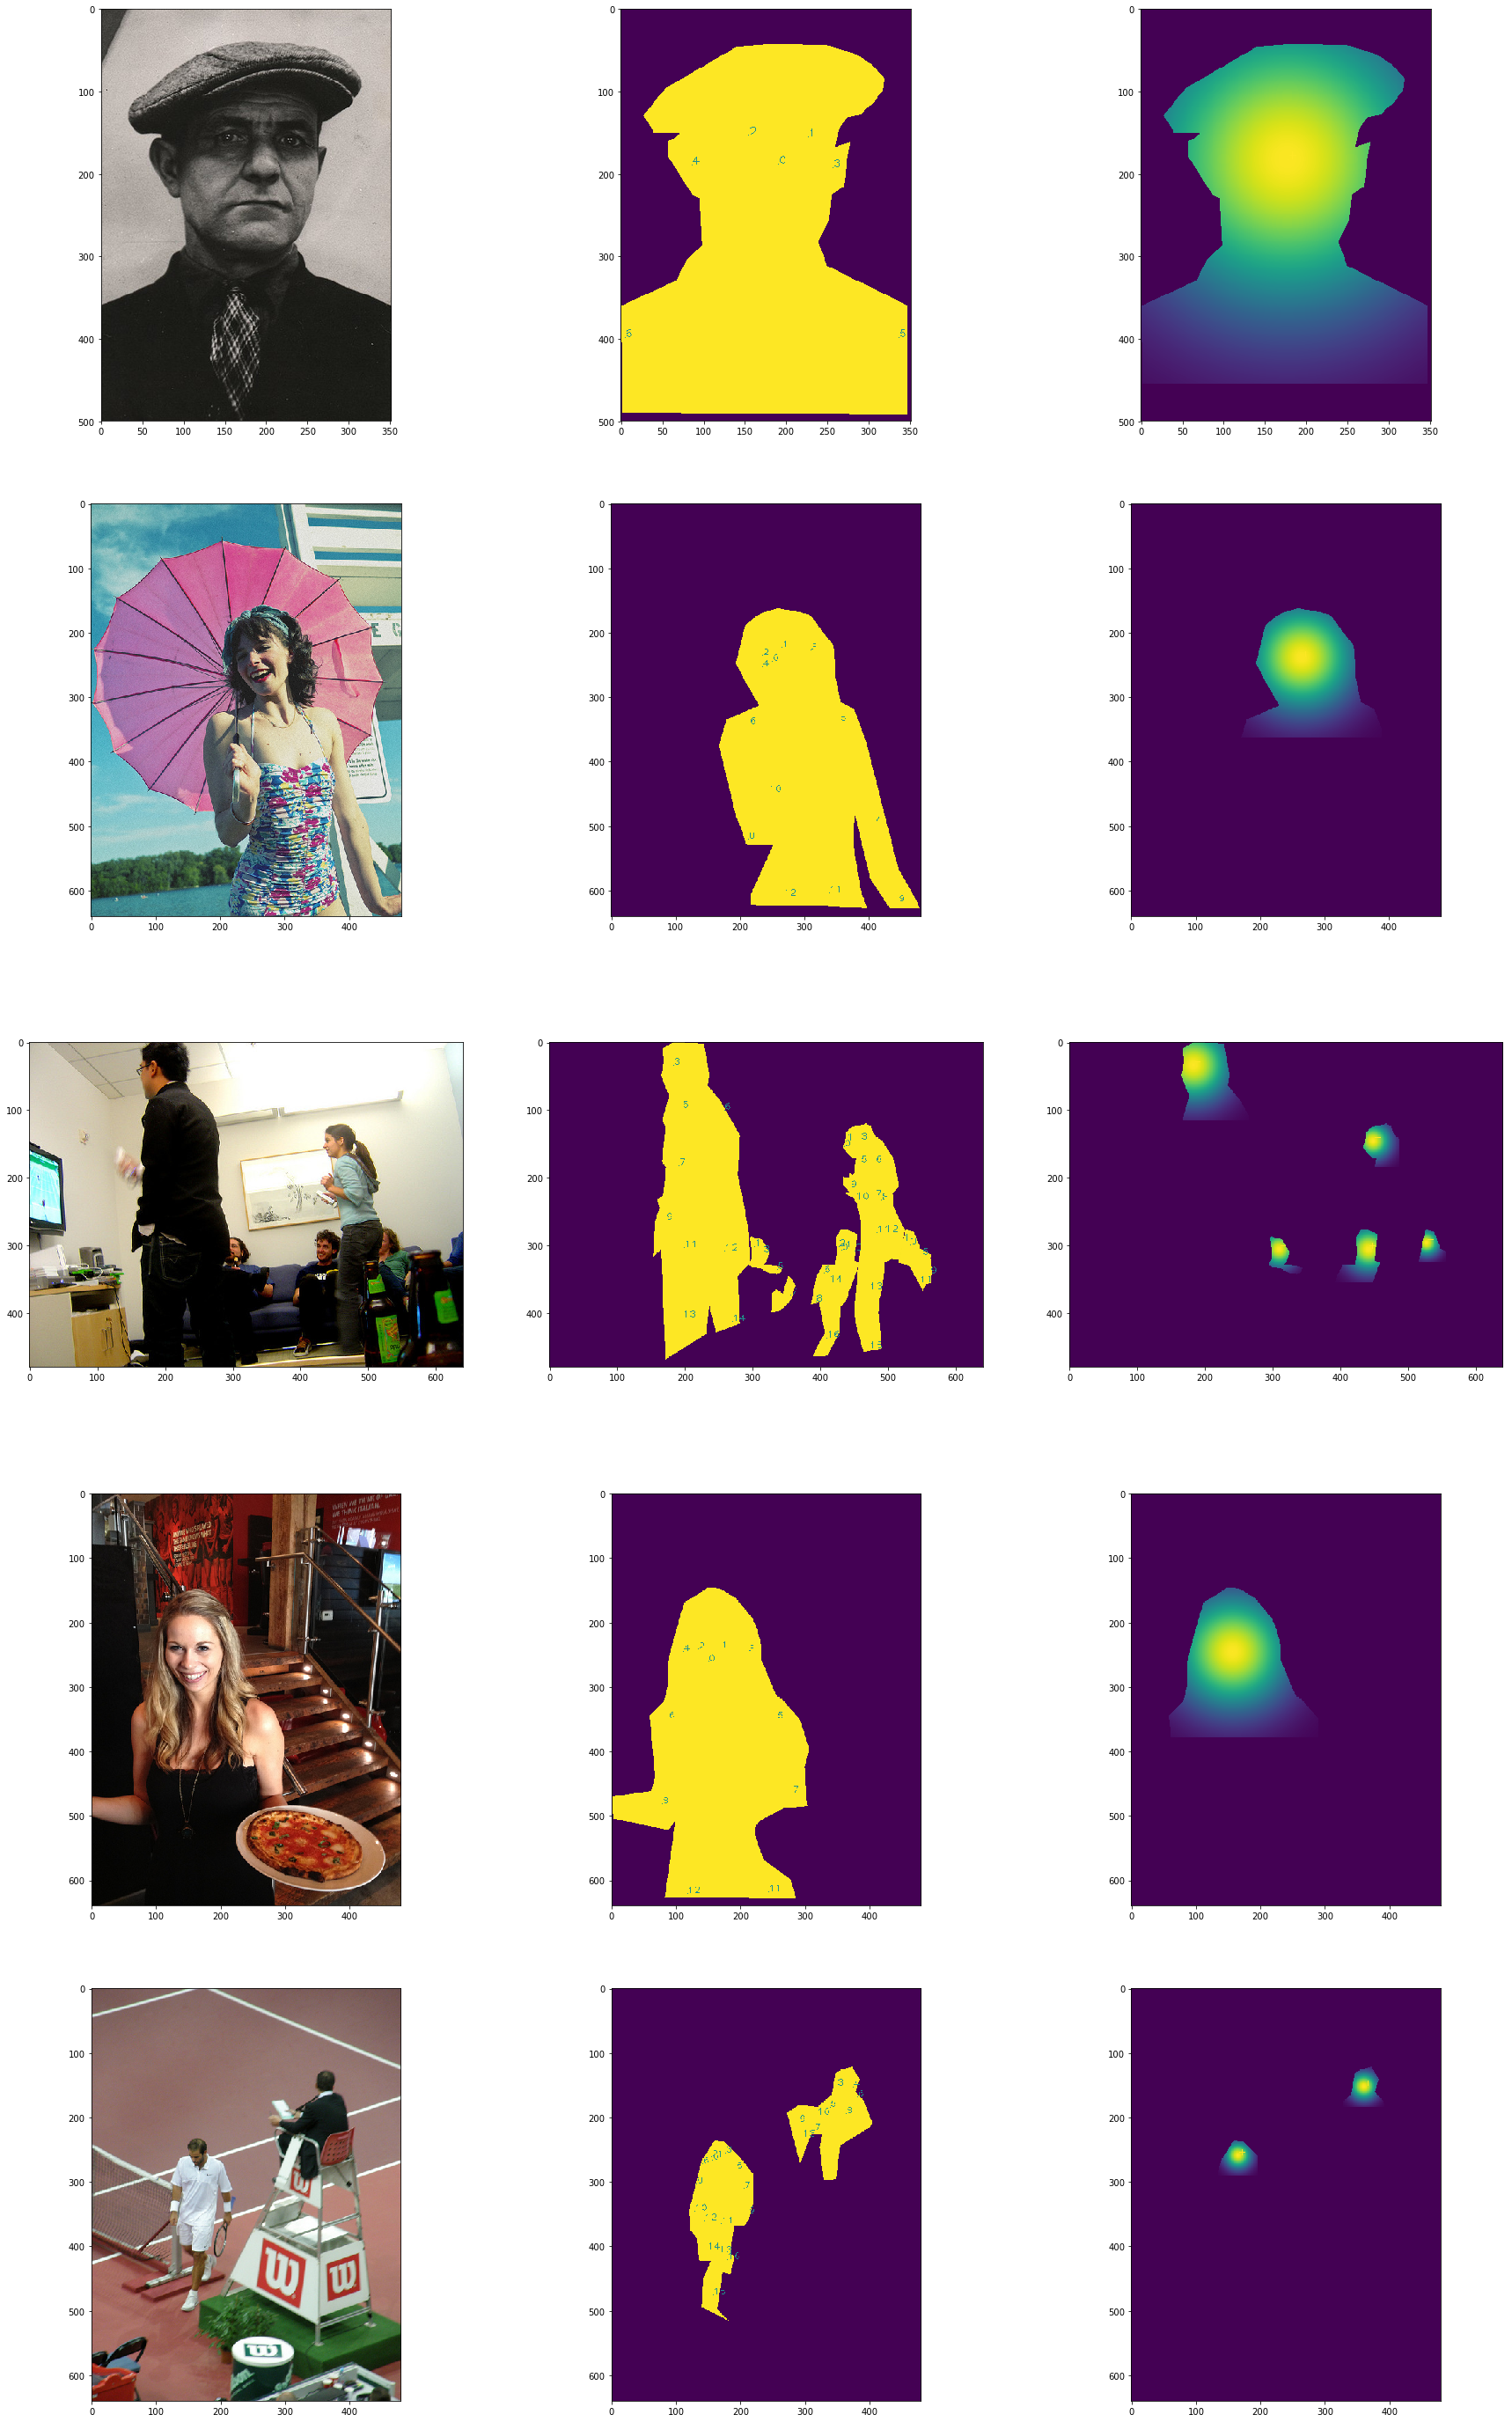

In [5]:
mtx = []

for i, info in enumerate(infos[5:10]):
    #print(i, info)
    img = load_image(info, None)
    mask = create_mask(coco, info, True)
    head = create_head_mask(coco, info, True)
    '''
    img = cv2.resize(img, (256, 256))
    mask = cv2.resize(mask, (256, 256))
    head = cv2.resize(head, (256, 256))
    '''

    mtx.append([
        (lambda a: lambda x: plt.imshow(a))(img),
        (lambda a: lambda x: plt.imshow(a))(mask),
        (lambda a: lambda x: plt.imshow(a))(head)
    ])

mtx_plot(mtx, (10, 10))
